In [1]:
import pandas as pd

In [82]:
nrows = 2 # to avoid loading full file each time
if nrows != None :
    mobpro = pd.read_csv('FD_MOBPRO_2016.csv', sep=';', nrows = nrows)
else:
    mobpro = pd.read_csv('FD_MOBPRO_2016.csv', sep=';')


In [83]:
mobpro.shape

(2, 32)

In [84]:
mobpro.describe()

,COMMUNE,DCFLT,DCLT,AGEREVQ,CS1,EMPL,ILT,ILTUU,IMMI,INATC,INEEM,INPOM,INPSM,IPONDI,LPRM,MOCO,NPERR,REGION,REGLT,SEXE,STAT,STOCD,TP,TRANS,TYPL,TYPMR,VOIT
count,2.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000
mean,1001.0,99999.0,1001.0,50.000000,1.500000,21.0,1.0,1.0,1.500000,1.0,0.0,3.000000,1.000000,5.0,1.0,22.0,3.500000,84.0,84.0,1.0,21.0,10.0,1.0,2.50000,1.0,41.0,2.000000
std,0.0,0.0,0.0,7.071068,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,1.414214,1.414214,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,2.12132,0.0,0.0,1.414214
min,1001.0,99999.0,1001.0,45.000000,1.000000,21.0,1.0,1.0,1.000000,1.0,0.0,2.000000,0.000000,5.0,1.0,22.0,3.000000,84.0,84.0,1.0,21.0,10.0,1.0,1.00000,1.0,41.0,1.000000
25%,1001.0,99999.0,1001.0,47.500000,1.250000,21.0,1.0,1.0,1.250000,1.0,0.0,2.500000,0.500000,5.0,1.0,22.0,3.250000,84.0,84.0,1.0,21.0,10.0,1.0,1.75000,1.0,41.0,1.500000
50%,1001.0,99999.0,1001.0,50.000000,1.500000,21.0,1.0,1.0,1.500000,1.0,0.0,3.000000,1.000000,5.0,1.0,22.0,3.500000,84.0,84.0,1.0,21.0,10.0,1.0,2.50000,1.0,41.0,2.000000
75%,1001.0,99999.0,1001.0,52.500000,1.750000,21.0,1.0,1.0,1.750000,1.0,0.0,3.500000,1.500000,5.0,1.0,22.0,3.750000,84.0,84.0,1.0,21.0,10.0,1.0,3.25000,1.0,41.0,2.500000
max,1001.0,99999.0,1001.0,55.000000,2.000000,21.0,1.0,1.0,2.000000,1.0,0.0,4.000000,2.000000,5.0,1.0,22.0,4.000000,84.0,84.0,1.0,21.0,10.0,1.0,4.00000,1.0,41.0,3.000000


In [85]:
mobpro.head()

,COMMUNE,ARM,DCFLT,DCLT,AGEREVQ,CS1,DEROU,DIPL_15,EMPL,ILT,ILTUU,IMMI,INATC,INEEM,INPOM,INPSM,IPONDI,LPRM,METRODOM,MOCO,NA5,NPERR,REGION,REGLT,SEXE,STAT,STOCD,TP,TRANS,TYPL,TYPMR,VOIT
0,1001,ZZZZZ,99999,1001,45,2,Z,C,21,1,1,2,1,0,4,2,5.0,1,M,22,AZ,4,84,84,1,21,10,1,4,1,41,3
1,1001,ZZZZZ,99999,1001,55,1,Z,D,21,1,1,1,1,0,2,0,5.0,1,M,22,AZ,3,84,84,1,21,10,1,1,1,41,1


## Weighted  function
IPONDI is the weight of the line. Indeed the dataset is about statistic, not the whole population is being asked the question, therefore each line come with an associated weight.
In order to perform any calculation, there will be a need to perform a weighted calculation.
I'm defining the weighted average with wavg function

In [86]:
def w_avg(data, weights):
    return (data * weights).sum() / weights.sum()

def w_sum(data, weights):
    return (data * weights).sum()

def w_values_counts(data, weights):
    return 

In [87]:
w = mobpro['IPONDI']
d = mobpro['AGEREVQ']

In [88]:
w_avg(d,w)

50.0

In [89]:
w_sum(d,w)

500.0

In [98]:
w_value_counts(mobpro['DIPL_15'], w)

C    1
D    1
Name: DIPL_15, dtype: int64

In [100]:
import geopandas as gpd

from matplotlib import pyplot as plt
%matplotlib inline


In [150]:
fp = 'regions-20180101-shp/regions-20180101.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df.head()

In [151]:
#remove islands
map_df = map_df[~map_df['nuts2'].isin(['FR94', 'FR92', 'FR93', 'FR91'])]
# drop Mayotte
map_df.drop(13, inplace=True)

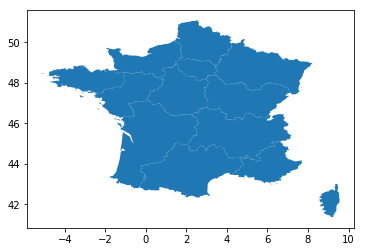

In [152]:
map_df.plot()

In [155]:
data = pd.read_csv('data.csv',sep=';')

/home/jc/miniconda3/envs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [156]:
data.head()

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,NB_F102_NB_COU,NB_F102_NB_ECL,NB_F103,NB_F103_NB_AIREJEU,NB_F103_NB_COU,NB_F103_NB_ECL,NB_F104,NB_F104_NB_AIREJEU,NB_F104_NB_COU,NB_F104_NB_ECL,NB_F105,NB_F105_NB_AIREJEU,NB_F105_NB_COU,NB_F105_NB_ECL,NB_F106,NB_F106_NB_AIREJEU,NB_F106_NB_COU,NB_F106_NB_ECL,NB_F107,NB_F107_NB_AIREJEU,NB_F107_NB_COU,NB_F107_NB_ECL,NB_F108,NB_F108_NB_AIREJEU,NB_F108_NB_COU,NB_F108_NB_ECL,NB_F109,NB_F109_NB_AIREJEU,NB_F109_NB_COU,NB_F109_NB_ECL,...,NB_F114,NB_F114_NB_AIREJEU,NB_F114_NB_COU,NB_F114_NB_ECL,NB_F116,NB_F116_NB_AIREJEU,NB_F116_NB_COU,NB_F116_NB_ECL,NB_F117,NB_F117_NB_AIREJEU,NB_F117_NB_COU,NB_F117_NB_ECL,NB_F118,NB_F118_NB_AIREJEU,NB_F118_NB_COU,NB_F118_NB_ECL,NB_F119,NB_F119_NB_AIREJEU,NB_F119_NB_COU,NB_F119_NB_ECL,NB_F120,NB_F120_NB_AIREJEU,NB_F120_NB_COU,NB_F120_NB_ECL,NB_F121,NB_F121_NB_AIREJEU,NB_F121_NB_COU,NB_F121_NB_ECL,NB_F201,NB_F201_NB_AIREJEU,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
0,1001,L'Abergement-Clémenciat,84,1,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1002,L'Abergement-de-Varey,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1004,Ambérieu-en-Bugey,84,1,1,2,1,1,4,4,0,2,2,8,1,2,0,0,0,0,0,0,0,0,1,2,1,1,2,2,0,1,0,0,0,0,1,1,0,0,...,2,3,2,2,3,3,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,0,0,0,0,0,0,1,3,0,0,0,0
3,1005,Ambérieux-en-Dombes,84,1,0,0,0,0,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1006,Ambléon,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
data.shape

(34970, 96)

In [158]:
data.describe()

,REG,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,NB_F102_NB_COU,NB_F102_NB_ECL,NB_F103,NB_F103_NB_AIREJEU,NB_F103_NB_COU,NB_F103_NB_ECL,NB_F104,NB_F104_NB_AIREJEU,NB_F104_NB_COU,NB_F104_NB_ECL,NB_F105,NB_F105_NB_AIREJEU,NB_F105_NB_COU,NB_F105_NB_ECL,NB_F106,NB_F106_NB_AIREJEU,NB_F106_NB_COU,NB_F106_NB_ECL,NB_F107,NB_F107_NB_AIREJEU,NB_F107_NB_COU,NB_F107_NB_ECL,NB_F108,NB_F108_NB_AIREJEU,NB_F108_NB_COU,NB_F108_NB_ECL,NB_F109,NB_F109_NB_AIREJEU,NB_F109_NB_COU,NB_F109_NB_ECL,NB_F110,NB_F110_NB_AIREJEU,NB_F110_NB_COU,...,NB_F114,NB_F114_NB_AIREJEU,NB_F114_NB_COU,NB_F114_NB_ECL,NB_F116,NB_F116_NB_AIREJEU,NB_F116_NB_COU,NB_F116_NB_ECL,NB_F117,NB_F117_NB_AIREJEU,NB_F117_NB_COU,NB_F117_NB_ECL,NB_F118,NB_F118_NB_AIREJEU,NB_F118_NB_COU,NB_F118_NB_ECL,NB_F119,NB_F119_NB_AIREJEU,NB_F119_NB_COU,NB_F119_NB_ECL,NB_F120,NB_F120_NB_AIREJEU,NB_F120_NB_COU,NB_F120_NB_ECL,NB_F121,NB_F121_NB_AIREJEU,NB_F121_NB_COU,NB_F121_NB_ECL,NB_F201,NB_F201_NB_AIREJEU,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
count,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,...,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000,34970.000000
mean,52.276351,0.106091,0.171004,0.058850,0.075836,0.605691,0.820932,0.069145,0.326194,0.461710,1.149814,0.082671,0.211724,0.004575,0.005948,0.000286,0.002431,0.011810,0.013840,0.000086,0.002088,0.162911,0.405891,0.100286,0.112983,0.115785,0.143838,0.002345,0.055276,0.022762,0.050786,0.003660,0.003918,0.067372,0.070689,0.000257,0.004833,0.005061,0.005633,0.003946,...,0.184329,0.217787,0.183643,0.181012,0.388419,0.408007,0.385359,0.382556,0.105862,0.112983,0.001687,0.016843,0.049385,0.052902,0.001373,0.008979,0.008693,0.009036,0.008522,0.008522,0.186731,0.299028,0.185073,0.182699,0.409236,0.464198,0.407206,0.403489,0.024335,0.025365,0.016385,0.017529,0.380955,0.637832,0.058479,0.168859,0.035430,0.012840,0.031684,0.046354
std,24.333346,0.639041,0.963478,0.541743,0.577116,1.327366,2.053355,0.386613,0.880002,0.942743,4.254629,0.393621,0.669633,0.072788,0.159960,0.016908,0.054218,0.138225,0.182078,0.009262,0.047485,0.481429,1.355600,0.353722,0.384455,0.609583,0.848913,0.055007,0.350182,0.164987,0.413940,0.061795,0.068161,0.290216,0.318227,0.016041,0.083563,0.075267,0.086209,0.065375,...,1.042408,1.342271,1.040717,1.023616,0.908573,1.037413,0.905354,0.880945,0.373264,0.418160,0.043081,0.143000,0.330761,0.358174,0.043422,0.113840,0.101935,0.109220,0.100822,0.100822,1.763560,3.873002,1.759986,1.747197,1.987021,2.316747,1.973366,1.950302,0.229654,0.240493,0.196455,0.219203,0.910237,1.746136,0.534690,2.559079,0.421921,0.148316,0.827390,1.085125
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.

In [167]:
data['NB_F101_NB_AIREJEU'].value_counts()

0      32097
1       1252
2       1039
3        299
4        139
5         55
6         25
7         20
8         10
10         8
9          6
11         5
12         2
13         2
14         2
24         1
15         1
111        1
16         1
17         1
21         1
33         1
22         1
26         1
Name: NB_F101_NB_AIREJEU, dtype: int64

In [169]:
data[data['NB_F101_NB_AIREJEU']==111]

,CODGEO,LIBGEO,REG,DEP,NB_F101,NB_F101_NB_AIREJEU,NB_F101_NB_COU,NB_F101_NB_ECL,NB_F102,NB_F102_NB_AIREJEU,NB_F102_NB_COU,NB_F102_NB_ECL,NB_F103,NB_F103_NB_AIREJEU,NB_F103_NB_COU,NB_F103_NB_ECL,NB_F104,NB_F104_NB_AIREJEU,NB_F104_NB_COU,NB_F104_NB_ECL,NB_F105,NB_F105_NB_AIREJEU,NB_F105_NB_COU,NB_F105_NB_ECL,NB_F106,NB_F106_NB_AIREJEU,NB_F106_NB_COU,NB_F106_NB_ECL,NB_F107,NB_F107_NB_AIREJEU,NB_F107_NB_COU,NB_F107_NB_ECL,NB_F108,NB_F108_NB_AIREJEU,NB_F108_NB_COU,NB_F108_NB_ECL,NB_F109,NB_F109_NB_AIREJEU,NB_F109_NB_COU,NB_F109_NB_ECL,...,NB_F114,NB_F114_NB_AIREJEU,NB_F114_NB_COU,NB_F114_NB_ECL,NB_F116,NB_F116_NB_AIREJEU,NB_F116_NB_COU,NB_F116_NB_ECL,NB_F117,NB_F117_NB_AIREJEU,NB_F117_NB_COU,NB_F117_NB_ECL,NB_F118,NB_F118_NB_AIREJEU,NB_F118_NB_COU,NB_F118_NB_ECL,NB_F119,NB_F119_NB_AIREJEU,NB_F119_NB_COU,NB_F119_NB_ECL,NB_F120,NB_F120_NB_AIREJEU,NB_F120_NB_COU,NB_F120_NB_ECL,NB_F121,NB_F121_NB_AIREJEU,NB_F121_NB_COU,NB_F121_NB_ECL,NB_F201,NB_F201_NB_AIREJEU,NB_F202,NB_F202_NB_AIREJEU,NB_F203,NB_F203_NB_AIREJEU,NB_F303,NB_F303_NB_SALLES,NB_F304,NB_F305,NB_F306,NB_F306_NB_SALLES
29274,75056,Paris,11,75,84,111,81,82,57,78,2,22,82,439,38,67,2,2,1,2,0,0,0,0,11,37,9,10,48,67,4,33,6,11,0,5,7,7,1,2,...,130,167,130,127,60,75,60,58,14,14,3,7,1,1,0,0,6,6,6,6,236,589,236,235,192,229,189,185,0,0,0,0,0,0,83,401,58,18,145,184
